## **Data Exploration - Training Dataset**

In this notebook we carry out a quick and comprehensive exploration of the data in order to understand its characteristics and structure

In [1]:
# Importing some packages
import pandas as pd
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

Load the dataset and process the columns

In [2]:
# Loading the 'food incidents' training dataset
food_dataset = pd.read_csv("../data/train/incidents_train.csv")

food_dataset.sample(3)

,Unnamed: 0,year,month,day,country,title,text,hazard-category,product-category,hazard,product
1511,1511,2016,2,5,uk,Chef’s Kitchen Limited withdraws its Premium Q...,The Chef’s Kitchen Limited is withdrawing its ...,allergens,prepared dishes and snacks,sulphur dioxide and sulphites,various prepared dishes
1438,1438,2015,11,13,uk,mo’s cookie dough withdraws its 'bake your own...,Mo’s Cookie Dough is withdrawing its 'bake you...,allergens,cereals and bakery products,cereals containing gluten and products thereof,cookies
2728,2847,2018,6,1,us,"Eddy Packing Co., Inc. Recalls Smoked Sausage ...","WASHINGTON, MAY 31, 2018 – Eddy Packing Co., I...",foreign bodies,"meat, egg and dairy products",plastic fragment,smoked sausage


In [3]:
# Dropping and renaming some columns
food_dataset.drop(columns=["Unnamed: 0"], inplace= True)
food_dataset.rename(columns={"hazard-category": "hazard_category", "product-category": "product_category"}, inplace= True)

food_dataset.sample(3)

,year,month,day,country,title,text,hazard_category,product_category,hazard,product
2247,2017,6,10,us,gourmet boutique llc recalls ready-to-eat brea...,"WASHINGTON, June 9, 2017 – Gourmet Boutique LL...",allergens,"meat, egg and dairy products",milk and products thereof,chicken breast
3779,2020,4,24,ca,Farm Boy brand Spinach Spread & Dip recalled d...,Food Recall Warning (Allergen) - Farm Boy bran...,allergens,"soups, broths, sauces and condiments",eggs and products thereof,dip-sauce
34,1998,3,26,ca,Archive - ALLERGY ALERT - UNDECLARED SOY PROTE...,Newsroom > Food Recalls and Allergy Alerts > A...,allergens,cereals and bakery products,soybeans and products thereof,cakes


Presented below are the maximum, minimum, and mean values for the number of characters and tokens in the 'titles' and 'text' columns

In [4]:
print("'Title' Characteristics:\n")
print(f"Min Characters {food_dataset["title"].apply(len).min()}")
print(f"Max Characters {food_dataset["title"].apply(len).max()}")
print(f"Mean Characters {food_dataset["title"].apply(len).mean().round(2)}")
print(f"\nMin Tokens {food_dataset["title"].apply(lambda row: len(word_tokenize(row))).min()}")
print(f"Max Tokens {food_dataset["title"].apply(lambda row: len(word_tokenize(row))).max()}")
print(f"Mean Tokens {food_dataset["title"].apply(lambda row: len(word_tokenize(row))).mean().round(2)}")

'Title' Characteristics:

Min Characters 5
Max Characters 271
Mean Characters 88.06

Min Tokens 1
Max Tokens 55
Mean Tokens 14.07


In [5]:
print("'Text' Characteristics:\n")
print(f"Min Characters {food_dataset["text"].apply(len).min()}")
print(f"Max Characters {food_dataset["text"].apply(len).max()}")
print(f"Mean Characters {food_dataset["text"].apply(len).mean().round(2)}")
print(f"\nMin Tokens {food_dataset["text"].apply(lambda row: len(word_tokenize(row))).min()}")
print(f"Max Tokens {food_dataset["text"].apply(lambda row: len(word_tokenize(row))).max()}")
print(f"Mean Tokens {food_dataset["text"].apply(lambda row: len(word_tokenize(row))).mean().round(2)}")

'Text' Characteristics:

Min Characters 62
Max Characters 48318
Mean Characters 2335.49

Min Tokens 10
Max Tokens 14033
Mean Tokens 430.95


Based on the results below, records are available from the year 1994 to 2022

In [7]:
food_dataset["year"].unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])

All the data is derived from 9 countries, as shown below

In [8]:
food_dataset["country"].unique()

array(['us', 'au', 'ca', 'na', 'hk', 'ie', 'uk', 'sg', 'scot'],
      dtype=object)

In [9]:
# Finding the records per year and country
records_by_year_country = (
    food_dataset.groupby(["year", "country"])
    .agg(total_records=("title", "count"))
    .sort_values(by="year", ascending=True)
    .reset_index()
)

# Pivoting
records_by_year_country = records_by_year_country.pivot(
    index="year", columns="country", values="total_records"
).fillna(0)

Below, we can observe the number of records from each country over the years, with the USA contributing the most records in the past 10 years.

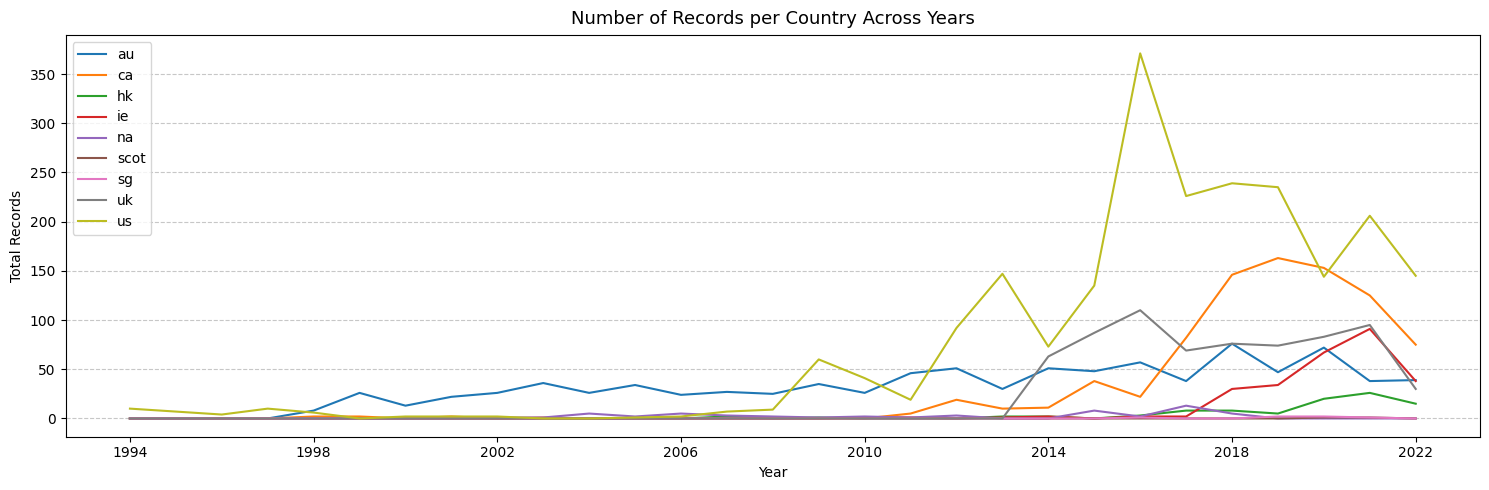

In [ ]:
# Setting the figure of the chart
plt.figure(figsize=(15, 5))

# Iterating over the columns
for country in records_by_year_country.columns:

    # Plotting the line chart
    plt.plot(
        records_by_year_country.index, records_by_year_country[country], label=country
    )

# Adding some parameters
plt.title("Number of Records per Country Across Years", fontsize=13, pad=8)
plt.xlabel("Year", fontsize=10)
plt.xticks(range(1994, 2023, 4))
plt.ylabel("Total Records", fontsize=10)
plt.legend(fontsize=10, loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

Compute the frequency of each label for each classification task

In [11]:
# Hazard-Category distribution
hazard_category_distribution = (
    food_dataset.groupby(["hazard_category"])
    .agg(frequency=("title", "count"))
    .sort_values(by="frequency", ascending=False)
    .reset_index()
    .rename(columns={"hazard_category": "label"})
)

# Product-Category distribution
product_category_distribution = (
    food_dataset.groupby(["product_category"])
    .agg(frequency=("title", "count"))
    .sort_values(by="frequency", ascending=False)
    .reset_index()
    .rename(columns={"product_category": "label"})
)

# Hazard distribution
hazard_distribution = (
    food_dataset.groupby(["hazard"])
    .agg(frequency=("title", "count"))
    .sort_values(by="frequency", ascending=False)
    .reset_index()
    .rename(columns={"hazard": "label"})
)

# Product distribution
product_distribution = (
    food_dataset.groupby(["product"])
    .agg(frequency=("title", "count"))
    .sort_values(by="frequency", ascending=False)
    .reset_index()
    .rename(columns={"product": "label"})
)

Below, we can observe the distinct labels for each classification task.

In [12]:
print("Number of hazard-category labels:", len(hazard_category_distribution))
print("Number of product-category labels:", len(product_category_distribution))
print("Number of hazard labels:", len(hazard_distribution))
print("Number of product labels:", len(product_distribution))

Number of hazard-category labels: 10
Number of product-category labels: 22
Number of hazard labels: 128
Number of product labels: 1022


Below, we can observe the distribution of labels for each classification task.

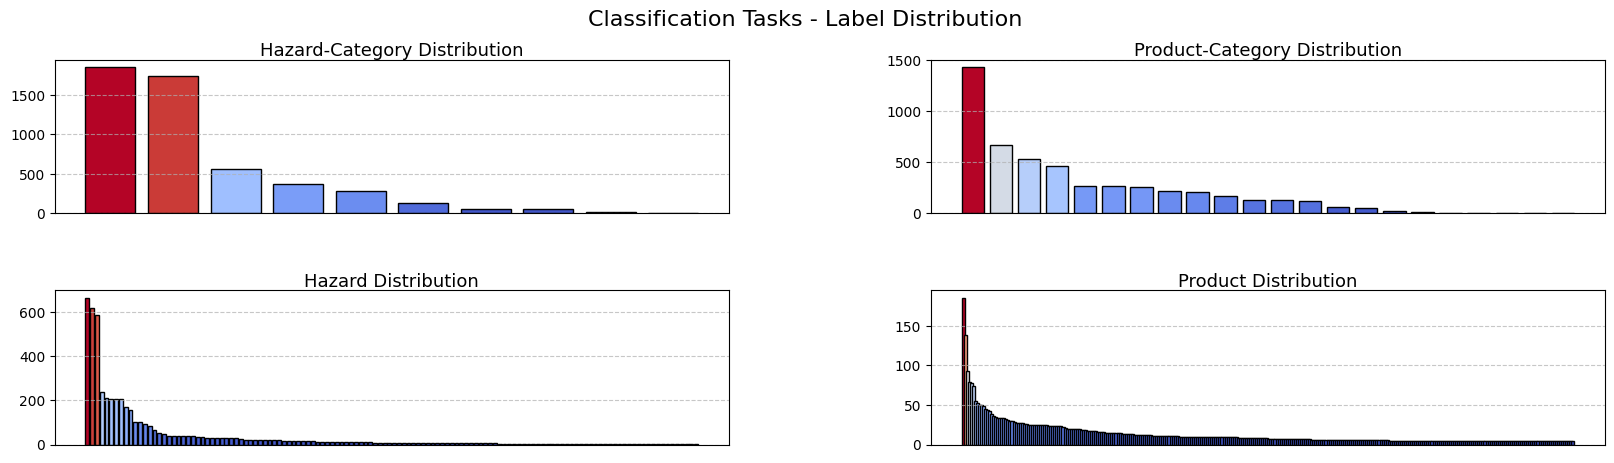

In [ ]:
# Creating the figure and axes for the charts
fig, axes = plt.subplots(2, 2, figsize=(20, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Color for all charts
color = plt.cm.coolwarm

# Setting the data
data = {
    "Hazard-Category Distribution": hazard_category_distribution,
    "Product-Category Distribution": product_category_distribution,
    "Hazard Distribution": hazard_distribution,
    "Product Distribution": product_distribution.iloc[:300],
}


# Iterating over the data
for (title, chart_data), ax in zip(data.items(), axes.flat):

    # Normalizing frequencies for heatmap color effect
    norm = plt.Normalize(vmin=min(chart_data["frequency"]), vmax=max(chart_data["frequency"]))
    colors = color(norm(chart_data["frequency"]))

    # Checking the title and creating the bar chart
    if title == "Product Distribution":

        bars = ax.bar(chart_data["label"], chart_data["frequency"], color=colors, edgecolor="black", width=1.5)

    else:

        bars = ax.bar(chart_data["label"], chart_data["frequency"], color=colors, edgecolor="black")

    # Setting some parameters
    ax.set_title(title, fontsize=13, pad=2)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xticks([])

# Adding an overall title
fig.suptitle("Classification Tasks - Label Distribution", fontsize=16)

#Showing the plot
plt.show()

Based on the following experiment, we can see that in all classification tasks, samples of too many labels are needed to outperform samples of the dominant label

In [ ]:
# Setting up the data
data = {
    "Hazard-Category": hazard_category_distribution,
    "Product-Category": product_category_distribution,
    "Hazard": hazard_distribution,
    "Product": product_distribution,
}

# Iterating over the data
for title, df in data.items():

    # Reversing the dataframe to start summing from the bottom
    reversed = df[::-1].reset_index()

    # Calculating the cumulative sum
    reversed["cumulative_sum"] = reversed["frequency"].cumsum()

    # Finding how many labels are needed to match or exceed the first label's samples
    labels_needed = reversed[reversed["cumulative_sum"] >= product_category_distribution["frequency"][0]].index[0] + 1

    print(f"{title} Classification Task: Needs samples of {labels_needed} labels to match or exceed the samples of the most popular label (Total labels: {len(df)})")

Hazard-Category Classification Task: Needs samples of 8 labels to exceed the samples of the most popular label (Total labels: 10)
Product-Category Classification Task: Needs samples of 16 labels to exceed the samples of the most popular label (Total labels: 22)
Hazard Classification Task: Needs samples of 115 labels to exceed the samples of the most popular label (Total labels: 128)
Product Classification Task: Needs samples of 802 labels to exceed the samples of the most popular label (Total labels: 1022)


Based on the above finding and the distribution of labels across all classification tasks, it is evident that the data exhibits a strong class imbalance with a small number of labels to have the most samples.